In [ ]:
   import matplotlib.pyplot as plt
   import numpy as np

   from astropy.modeling.fitting import LevMarLSQFitter
   import astropy.units as u

   from dust_attenuation.C00 import C00
   
   # Create artificial attenuation curve with C00 and Av = 1.3 mag
   # Better sampling using wavenumbers
   x = np.arange(0.5,8.0,0.1)/u.micron
   # Convert to microns
   x=1/x

   att_model = C00(Av=1.3)
   y = att_model(x)
   # add some noise 
   noise = np.random.normal(0, 0.2, y.shape)
   y+=noise

   # initialize the model
   c00_init = C00()

   # pick the fitter
   fit = LevMarLSQFitter()

   # fit the data to the FM90 model using the fitter
   #   use the initialized model as the starting point
   c00_fit = fit(c00_init, x.value, y)

   print ('Fit results:\n', c00_fit)
   # plot the observed data, initial guess, and final fit
   fig, ax = plt.subplots()

   ax.plot(1/x, y, 'ko', label='Observed Curve')
   ax.plot(1/x.value, c00_init(x.value), label='Initial guess')
   ax.plot(1/x.value, c00_fit(x.value), label='Fitted model')

   ax.set_xlabel('$x$ [$\mu m^{-1}$]')
   ax.set_ylabel('$Ax $')

   ax.set_title('Example C00 Fit ')

   ax.legend(loc='best')
   plt.tight_layout()
   plt.show()


In [ ]:
        import numpy as np
        import matplotlib.pyplot as plt
        import astropy.units as u

        from dust_attenuation.C00 import C00

        fig, ax = plt.subplots()

        # generate the curves and plot them
        x = np.arange(0.12,2.2,0.1)*u.micron

        Avs = [0.1,0.5,1.0,2.0,5.0]
        for cur_Av in Avs:
           att_model = C00(Av=cur_Av)
           ax.plot(1/x,att_model(x),label=r'A$_V$ = %.2f mag' % (cur_Av))

        ax.set_xlabel('$x$ [$\mu m^{-1}$]')
        ax.set_ylabel('$A(x)$ [mag]')

        ax.legend(loc='best')
        plt.show()


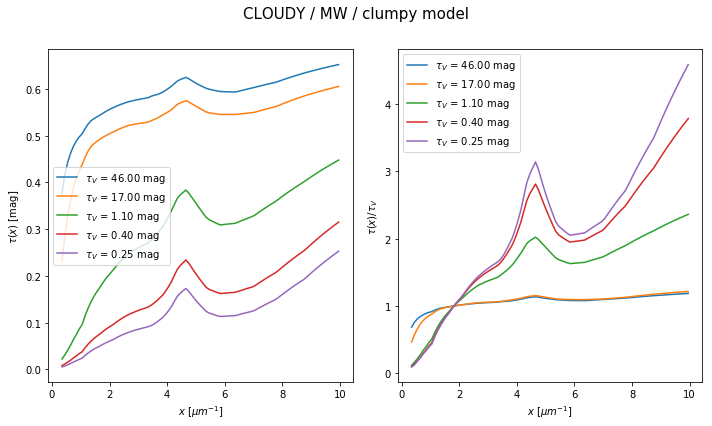

In [2]:
        import numpy as np
        import matplotlib.pyplot as plt
        import astropy.units as u

        from dust_attenuation.WG00 import WG00

        fig, ax = plt.subplots(1,2, figsize=(10,6))

        # generate the curves and plot them
        # Use 1/microns for a better sampling
        x = np.arange(0.35,10.0,0.1)/u.micron

        x_Vband = 0.55 # microns
        
        tau_Vs = [0.25,0.4,1.1,17.0,46.0]
        for tau_V in tau_Vs[::-1]:
           att_model = WG00(tau_V=tau_V)
           att_model.get_model(geometry = 'cloudy', dust_type = 'mw', dust_distribution = 'clumpy')
           ax[0].plot(x,att_model(1/x),label=r'$\tau_V$ = %.2f mag' % (tau_V))
           ax[1].plot(x,att_model(1/x)/att_model(x_Vband),label=r'$\tau_V$ = %.2f mag' % (tau_V))

        ax[0].set_xlabel('$x$ [$\mu m^{-1}$]')
        ax[0].set_ylabel(r'$\tau(x)$ [mag]')
        ax[1].set_xlabel('$x$ [$\mu m^{-1}$]')
        ax[1].set_ylabel(r'$\tau(x)/\tau_V$')
        
        
        
        ax[0].legend(loc='best')
        ax[1].legend(loc='best')
        fig.suptitle(r'CLOUDY / MW / clumpy model',size=15)
        plt.tight_layout()
        fig.subplots_adjust(top=0.88)

        plt.show()


In [ ]:
x = np.arange(0.33,10.0,0.1)/u.micron

In [ ]:
x*u.micron